#### Torchaudio basics

A basic introduction to the torchaudio library for audio processing.

In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt

# Download a sample audio file
SAMPLE_WAV_PATH = torchaudio.utils.download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")

In [3]:
# Get metadata from the audio file
metadata = torchaudio.info(SAMPLE_WAV_PATH)

print(f"Sample Rate: {metadata.sample_rate}")
print(f"Number of Channels: {metadata.num_channels}")
print(f"Number of Frames: {metadata.num_frames}")
print(f"Duration (seconds): {metadata.num_frames / metadata.sample_rate}")
print(f"Bits per Sample: {metadata.bits_per_sample}")
print(f"Encoding: {metadata.encoding}")

Sample Rate: 16000
Number of Channels: 1
Number of Frames: 54400
Duration (seconds): 3.4
Bits per Sample: 16
Encoding: PCM_S


In [4]:
# Load the audio file
waveform, sample_rate = torchaudio.load(SAMPLE_WAV_PATH)

print(f"Original Sample Rate: {sample_rate}")
print(f"Waveform Shape: {waveform.shape}")
print(f"Waveform Tensor Dtype: {waveform.dtype}")
print(f"First 10 samples: {waveform[0, :10]}")

Original Sample Rate: 16000
Waveform Shape: torch.Size([1, 54400])
Waveform Tensor Dtype: torch.float32
First 10 samples: tensor([0.0183, 0.0180, 0.0180, 0.0187, 0.0199, 0.0198, 0.0196, 0.0187, 0.0187,
        0.0190])


In [5]:
# Create a Resample transform
resampler = T.Resample(orig_freq=sample_rate, new_freq=8000)

# Apply the transform
resampled_waveform = resampler(waveform)

print(f"Original waveform shape: {waveform.shape}")
print(f"Resampled waveform shape: {resampled_waveform.shape}")

Original waveform shape: torch.Size([1, 54400])
Resampled waveform shape: torch.Size([1, 27200])


In [6]:
# Create a Spectrogram transform
spectrogram_transform = T.Spectrogram(n_fft=1024)

# Apply the transform to the original waveform
spectrogram = spectrogram_transform(waveform)

print(f"Spectrogram shape: {spectrogram.shape}")

Spectrogram shape: torch.Size([1, 513, 107])


In [7]:
# Create a MelSpectrogram transform
mel_spectrogram_transform = T.MelSpectrogram(sample_rate=sample_rate, n_fft=1024, n_mels=128)

# Apply the transform
mel_spectrogram = mel_spectrogram_transform(waveform)

print(f"Mel Spectrogram shape: {mel_spectrogram.shape}")

Mel Spectrogram shape: torch.Size([1, 128, 107])


In [8]:
# Save the resampled waveform to a new file
torchaudio.save("resampled_output.wav", resampled_waveform, sample_rate=8000)

print("Saved resampled audio to resampled_output.wav")

Saved resampled audio to resampled_output.wav


Create MFCCs

In [10]:
# Create the MFCC transform
# n_mfcc is the number of coefficients to return
mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=40,  # A common choice is 40 coefficients
)

# Apply the transform
mfcc = mfcc_transform(waveform)

print(f"Original waveform shape: {waveform.shape}")
print(f"MFCC shape: {mfcc.shape}") # Shape: (num_channels, n_mfcc, time)

Original waveform shape: torch.Size([1, 54400])
MFCC shape: torch.Size([1, 40, 273])


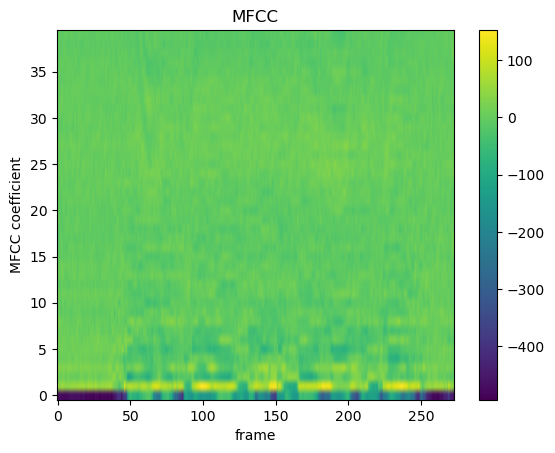

In [11]:
def plot_spectrogram(specgram, title=None, ylabel='freq_bin'):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or 'Spectrogram (db)')
    axs.set_ylabel(ylabel)
    axs.set_xlabel('frame')
    im = axs.imshow(specgram, origin='lower', aspect='auto')
    fig.colorbar(im, ax=axs)
    plt.show()

# Visualize the MFCCs
plot_spectrogram(mfcc[0], title="MFCC", ylabel='MFCC coefficient')